In [139]:
%reset

In [187]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import xclim as xc
import xarray as xr

In [188]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)

In [189]:
import sys
#this is to reload the work in progress modules that are not in the current directory
import importlib
import hydroplotting

In [190]:
%reload_ext autoreload
%autoreload 1

In [194]:
#load and plot SNOTEL data
from hydroplotting import funcutils as fc

#get paths for data files
path_Skook_obs = ROOT_DIR + '/Data/Raw/bcqc_47.68000_-121.61000._Skookum_Creek.txt'
path_Alpine_obs = ROOT_DIR + '/Data/Raw/bcqc_47.78000_-121.70000_Alpine_Meadows.txt'

#path to SPU data
path_Alpine_P_SPU = ROOT_DIR + '/Data/Raw/p0908_precip_AlpineM.txt'
path_Skook_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.txt'

path_Alpine_T_SPU = ROOT_DIR + '/Data/Raw/t0908_temp_AlpineM.txt'
path_Skook_T_SPU = ROOT_DIR + '/Data/Raw/t0912_temp_SkooKumCr.txt'

#path_snotel_skooK_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.txt'
#path to model data
#path_Alpine_model = ROOT_DIR + '/Data/Raw/comparison_Pixel.Alpine_Meadows_prism_grid.csv'
#path_Skook_model = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_grid.csv'
path_Alpine_model = ROOT_DIR + '/Data/Raw/comparison_Pixel.Alpine_Meadows_baseline.csv'
path_Skook_model = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05.csv'
path_Skook_model_1deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_1deg.csv'
path_Skook_model_2deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_2deg.csv'
path_Skook_model_3deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_3deg.csv'
path_Skook_model_4deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_4deg.csv'

#path_Alpine_model = ROOT_DIR + '/Data/Raw/comparison_Pixel.Alpine_Meadows_prism_grid.csv'
#path_Skook_model = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_grid.csv'


#path to Tolt Dam
path_Tolt_dam_T_SPU = ROOT_DIR + '/Data/Raw/t8508_tempToltDam.txt'

In [195]:
#get into the xarray and xclim format for use with the xclim package
#model
df_model_data_Alpine = fc.get_model_dataframe(path_Alpine_model)
df_model_data_Skookum = fc.get_model_dataframe(path_Skook_model)

df_model_data_Skookum_1deg = fc.get_model_dataframe(path_Skook_model_1deg)
df_model_data_Skookum_2deg = fc.get_model_dataframe(path_Skook_model_2deg)
df_model_data_Skookum_3deg = fc.get_model_dataframe(path_Skook_model_3deg)
df_model_data_Skookum_4deg = fc.get_model_dataframe(path_Skook_model_4deg)

ds_model_point_Alpine = fc.model_point_data_xr(df_model_data_Alpine)
ds_model_point_Skookum = fc.model_point_data_xr(df_model_data_Skookum)
ds_model_point_Skookum_1deg = fc.model_point_data_xr(df_model_data_Skookum_1deg)
ds_model_point_Skookum_2deg = fc.model_point_data_xr(df_model_data_Skookum_2deg)
ds_model_point_Skookum_3deg = fc.model_point_data_xr(df_model_data_Skookum_3deg)
ds_model_point_Skookum_4deg = fc.model_point_data_xr(df_model_data_Skookum_4deg)

#observations
df_snotel_Skookum = fc.snotel_data(path_Skook_obs)
df_snotel_Alpine = fc.snotel_data(path_Alpine_obs)
ds_bcbq_obs_Skookum = fc.bcbq_snotel_data_xr(df_snotel_Skookum)
ds_bcbq_obs_Alpine = fc.bcbq_snotel_data_xr(df_snotel_Alpine)

#SPU
df_snotel_obs_SPU_Skookum_P = fc.spu_snotel_data(path_Skook_P_SPU)
df_snotel_obs_SPU_Alpine_P = fc.spu_snotel_data(path_Alpine_P_SPU)

ds_snotel_obs_SPU_Skookum_P = fc.spu_snotel_data_xr(df_snotel_obs_SPU_Skookum_P)
ds_snotel_obs_SPU_Alpine_P = fc.spu_snotel_data_xr(df_snotel_obs_SPU_Alpine_P)
#df_snotel_obs_SPU_Skookum = fc.spu_snotel_data(path_Alpine_P_SPU)
#df_snotel_obs_SPU_Alpine = fc.spu_snotel_data(path_Skook_P_SPU)

df_snotel_obs_SPU_Skookum_T = fc.spu_snotel_data(path_Skook_T_SPU)
df_snotel_obs_SPU_Alpine_T = fc.spu_snotel_data(path_Alpine_T_SPU)

#SPU_data_frame_T['Tmean_C'] = (SPU_data_frame_T['Avg'] - 32) * (5 / 9)
#SPU_data_frame_T['Tmin_C'] = (SPU_data_frame_T['Min'] - 32) * (5 / 9)
#SPU_data_frame_T['Tmax_C'] = (SPU_data_frame_T['Max'] - 32) * (5 / 9)

ds_snotel_obs_SPU_Skookum_T = fc.spu_snotel_data_xr_T(df_snotel_obs_SPU_Skookum_T)
ds_snotel_obs_SPU_Alpine_T = fc.spu_snotel_data_xr_T(df_snotel_obs_SPU_Alpine_T)

#back to data frames for plotting
df_snotel_obs_SPU_Skookum_T_ = ds_snotel_obs_SPU_Skookum_T.to_dataframe()
df_snotel_obs_SPU_Alpine_T_ = ds_snotel_obs_SPU_Alpine_T.to_dataframe()

In [200]:
time_slice = slice('2018-10-1','2019-09-30')
#season = 'MAM'
#observations

#airT_seas_snotel_bcbq_Skookum = xc.atmos.tg_mean(ds_bcbq_obs_Skookum.Tmean_C, season="MAM")

#airT_seas_snotel_bcbq_Skookum_year = xc.atmos.tg_mean( ds_bcbq_obs_Skookum.Tmean_C.sel(time=slice("2001-10-1", "2002-09-30")), season="MAM")

#test = ds_bcbq_obs_Skookum.Tmean_C.isel(time=(ds_bcbq_obs_Skookum.Tmean_C.time.dt.month == 1))

#test = ds_bcbq_obs_Skookum.Tmean_C.isel(time=(ds_bcbq_obs_Skookum.Tmean_C.time.dt.season == 'DJF'))

temp_o = ds_bcbq_obs_Skookum.Tmean_C.sel(
    time = time_slice).groupby('time.season').mean('time')
precip_o = ds_bcbq_obs_Skookum.daily_P_in.sel(
    time = time_slice).groupby('time.season').sum('time')

#temp_m = ds_model_point_Skookum.tmean_point.sel(
    #time = time_slice).groupby('time.season').mean('time')
#precip_m = ds_model_point_Skookum.prec_point.sel(
    #time = time_slice).groupby('time.season').sum('time')

#airT_seas_snotel_bcbq_Skookum_year = xc.atmos.tg_mean(ds_bcbq_obs_Skookum.Tmean_C.sel(time = time_slice), season=season)

#tas_C_snotel_bcbq_Skookum_year = xc.units.convert_units_to(airT_seas_snotel_bcbq_Skookum_year, "degC")

#print("airT_seas_snotel_bcbq_Skookum_year =", tas_C_snotel_bcbq_Skookum_year.mean())

#model
#airT_seas_model_Skookum_year = xc.atmos.tg_mean(ds_model_point_Skookum.tmean_point.sel(time = time_slice), season=season)
#tas_C_snotel_model_Skookum_year = xc.units.convert_units_to(airT_seas_model_Skookum_year, "degC")
#print("airT_seas_model_Skookum_year =", tas_C_snotel_model_Skookum_year.mean())

#sensitivity
#airT_seas_model_Skookum_year_1deg = xc.atmos.tg_mean(ds_model_point_Skookum_1deg.tmean_point.sel(time = time_slice), season=season)
#tas_C_snotel_model_Skookum_year_1deg = xc.units.convert_units_to(airT_seas_model_Skookum_year_1deg, "degC")
#print("airT_seas_model_Skookum_year =", tas_C_snotel_model_Skookum_year_1deg.mean())


#sensitivity

#tas_C_snotel_bcbq_Skookum = xc.units.convert_units_to(airT_seas_snotel_bcbq_Skookum, "degC")


#tas_C_model_Skookum = xc.units.convert_units_to(airT_seas_model_Skookum, "degC")



#print("airT_seas_snotel_bcbq_Skookum =", tas_C_snotel_bcbq_Skookum.mean())


#print("airT_seas_model_Skookum =", tas_C_model_Skookum.mean())
print('obs temp', temp_o)
print('obs Pin', precip_o)
print ('model temp', temp_m)
print('precip model', precip_m)

obs temp <xarray.DataArray 'Tmean_C' (season: 4)>
array([ 0.26987654, 12.24203704,  5.54993961,  7.28089133])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
obs Pin <xarray.DataArray 'daily_P_in' (season: 4)>
array([48.4, 13.3, 26.5, 52.3])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
model temp <xarray.DataArray 'tmean_point' (season: 4)>
array([-3.21709088, 10.53068672, -0.52834981,  5.71538114])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
precip model <xarray.DataArray 'prec_point' (season: 4)>
array([66.15676593, 12.52503511, 48.21889122, 40.94150426])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'


In [175]:
ds_model_point_Skookum

<xarray.Dataset>
Dimensions:      (time: 8401)
Coordinates:
  * time         (time) datetime64[ns] 1995-10-01 1995-10-02 ... 2018-09-30
Data variables:
    Unnamed: 0   (time) object '1995-10-01' '1995-10-02' ... '2018-09-30'
    prec_point   (time) float64 0.02072 0.5493 0.3491 ... 0.0 0.1873 0.2019
    swq          (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmean_point  (time) float64 4.422 4.747 2.909 3.589 ... 13.54 11.12 6.277
    tmax_point   (time) float64 9.726 5.826 5.261 8.107 ... 20.43 16.12 9.415
    tmin_point   (time) float64 1.032 3.709 1.681 1.184 ... 8.006 6.23 4.65
    prec_ref     (time) float64 0.2 2.1 1.6 0.3 0.0 0.5 ... 0.0 0.0 0.0 0.0 0.1
    swe          (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmean_ref    (time) float64 5.967 7.683 3.678 4.822 ... 15.12 12.83 8.828
    tmax_ref     (time) float64 9.4 9.972 6.539 9.972 ... 19.13 19.7 17.41 9.972
    tmin_ref     (time) float64 3.106 4.25 2.533 2.533 ... 12.26 8.256 7.683
    SWE_m        (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [159]:
test

<xarray.DataArray 'Tmean_C' (season: 4)>
array([ 0.71493827, 13.43098765,  4.99637681,  7.92857143])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [61]:

df_Tolt_dam_T_SPU = fc.spu_snotel_data(path_Tolt_dam_T_SPU)
ds_Tolt_dam_T_SPU = fc.spu_snotel_data_xr_T(df_Tolt_dam_T_SPU)

df_Tolt_dam_T_SPU_ = ds_Tolt_dam_T_SPU.to_dataframe()
#ds_Tolt_dam_T_SPU

In [70]:
ds_Tolt_dam_T_SPU["time.season"]
#ds_Tolt_dam_T_SPU(time=slice("2000-06-01", "2000-06-10"))

<xarray.DataArray 'season' (time: 14977)>
array(['SON', 'SON', 'SON', ..., 'SON', 'SON', 'SON'], dtype='<U3')
Coordinates:
  * time     (time) datetime64[ns] 1979-10-01 1979-10-02 ... 2020-10-01

In [10]:
#calculate annual precipitation SPU
annual_P_Alpine_SPU = xc.atmos.precip_accumulation(ds_snotel_obs_SPU_Alpine_P.Total, freq="YS")
annual_P_Skookum_SPU = xc.atmos.precip_accumulation(ds_snotel_obs_SPU_Alpine_P.Total, freq="YS")

#convert to dataframe for plotting
annual_P_Alpine_SPU_df = annual_P_Alpine_SPU.to_dataframe()
annual_P_Skookum_SPU_df = annual_P_Skookum_SPU.to_dataframe()

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


In [11]:
#calculate annual precipitation model
annual_P_Alpine_model = xc.atmos.precip_accumulation(ds_model_point_Alpine.prec_point, freq="YS")
annual_P_Skookum_model = xc.atmos.precip_accumulation(ds_model_point_Skookum.prec_point, freq="YS")

#convert to dataframe for plotting
annual_P_Alpine_model_df = annual_P_Alpine_model.to_dataframe()
annual_P_Skookum_model_df = annual_P_Skookum_model.to_dataframe()

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


Text(0, 0.5, 'Total annual precipitation  [m]')

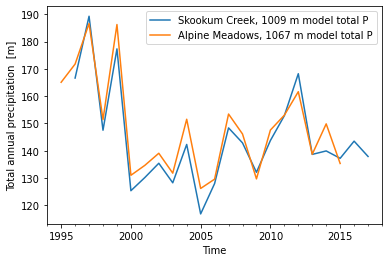

In [12]:
ax = annual_P_Skookum_model_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Alpine_model_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  [m]')

Text(0, 0.5, 'Model SWE [m]')

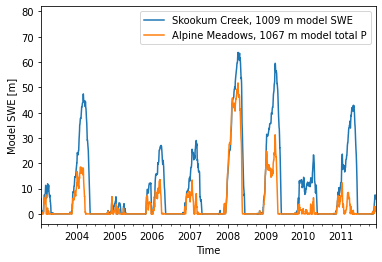

In [13]:
#plot model SWE
ax = df_model_data_Skookum.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model SWE')
df_model_data_Alpine.plot(kind='line', y = 'swq', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
ax.set_xlim([datetime(2003, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Model SWE [m]')

In [14]:
#calculate mean difference Skookum-Alpine
mean_model_diff_P = annual_P_Skookum_model_df.mean() - annual_P_Alpine_model_df.mean()
print('Mean annual precip model Skookum =', annual_P_Skookum_model_df.mean())
print('Mean annual precip model Alpine =', annual_P_Alpine_model_df.mean())
print('Model diff in annual P Skookum-Alpine =', mean_model_diff_P)

Mean annual precip model Skookum = prcptot    144.190229
dtype: float64
Mean annual precip model Alpine = prcptot    148.578229
dtype: float64
Model diff in annual P Skookum-Alpine = prcptot   -4.388
dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


Text(0, 0.5, 'Total annual precipitation  []')

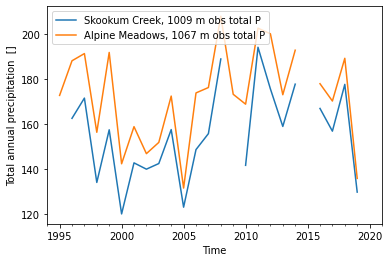

In [15]:
#calculate total P from observations
annual_P_Alpine_bcbq_obs = xc.atmos.precip_accumulation(ds_bcbq_obs_Alpine.daily_P_in, freq="YS")
annual_P_Skookum_bcbq_obs = xc.atmos.precip_accumulation(ds_bcbq_obs_Skookum.daily_P_in, freq="YS")

#convert to dataframe
annual_P_Alpine_bcbq_obs_df = annual_P_Alpine_bcbq_obs.to_dataframe()
annual_P_Skookum_bcbq_obs_df = annual_P_Skookum_bcbq_obs.to_dataframe()

#plot obs P

ax = annual_P_Skookum_bcbq_obs_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m obs total P')
annual_P_Alpine_bcbq_obs_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m obs total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')

prcptot   -24.342605
dtype: float64

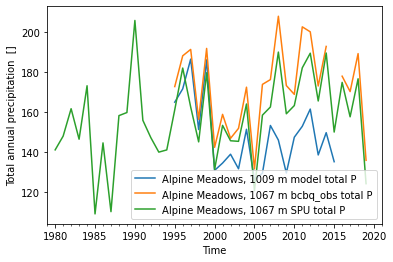

In [16]:
#snotel_Skookum.index.set_names('time', inplace=True)
#plot observed total P model vs. observed at Alpine Meadows
ax = annual_P_Alpine_model_df.plot(kind='line',  y = 'prcptot', label = 'Alpine Meadows, 1009 m model total P')
annual_P_Alpine_bcbq_obs_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m bcbq_obs total P', ax = ax)
annual_P_Alpine_SPU_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m SPU total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')
mean_model_obs_diff_P = annual_P_Alpine_model_df.mean()-annual_P_Alpine_bcbq_obs_df.mean()
mean_model_obs_diff_P

prcptot   -11.60068
dtype: float64

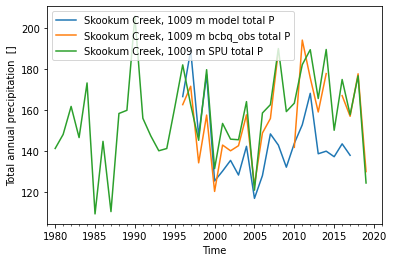

In [17]:
#plot observed total P model vs. observed at Alpine Meadows
ax = annual_P_Skookum_model_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Skookum_bcbq_obs_df.plot(kind='line', y = 'prcptot', label = 'Skookum Creek, 1009 m bcbq_obs total P', ax = ax)
annual_P_Skookum_SPU_df.plot(kind='line', y = 'prcptot', label = 'Skookum Creek, 1009 m SPU total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')
mean_model_obs_diff_P = annual_P_Skookum_model_df.mean()-annual_P_Skookum_bcbq_obs_df.mean()
mean_model_obs_diff_P

In [18]:
df_snotel_Skookum

,year,month,day,daily_P_in,Tmax_F,Tmin_F,Tmean_F,SWE_in,Tmean_C,Tmin_C,Tmax_C,SWE_m,datetime,water_year
time,,,,,,,,,,,,,,
1995-08-30,1995,8,30,NaN,65.40,48.92,53.04,0.0,11.688889,9.400000,18.555556,0.00000,1995-08-30,1995
1995-08-31,1995,8,31,NaN,72.61,48.92,61.28,0.0,16.266667,9.400000,22.561111,0.00000,1995-08-31,1995
1995-09-01,1995,9,1,NaN,78.79,58.19,67.46,0.0,19.700000,14.550000,25.994444,0.00000,1995-09-01,1995
1995-09-02,1995,9,2,NaN,82.91,58.19,68.49,0.0,20.272222,14.550000,28.283333,0.00000,1995-09-02,1995
1995-09-03,1995,9,3,NaN,80.85,50.98,62.31,0.0,16.838889,10.544444,27.138889,0.00000,1995-09-03,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,2021,9,26,0.3,56.13,43.77,50.98,0.1,10.544444,6.538889,13.405556,0.00254,2021-09-26,2021
2021-09-27,2021,9,27,1.5,50.98,40.68,44.80,0.2,7.111111,4.822222,10.544444,0.00508,2021-09-27,2021
2021-09-28,2021,9,28,1.9,43.77,39.65,41.71,0.2,5.394444,4.250000,6.538889,0.00508,2021-09-28,2021


Text(0, 0.5, 'Total annual precipitation  []')

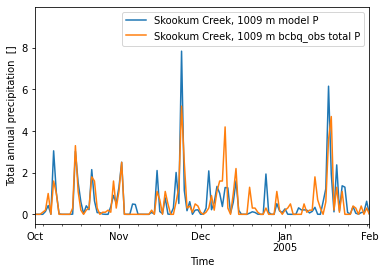

In [19]:
#plot precip in 2005
time_slice = [datetime(2004, 10, 1), datetime(2005, 2, 1)]

ax = df_model_data_Skookum.plot(kind='line',  y = 'prec_point', label = 'Skookum Creek, 1009 m model P')
#df_snotel_obs_SPU_Skookum_P.plot(kind='line', y = 'Total', label = 'Skookum Creek, 1009 m SPU total P', ax = ax)
df_snotel_Skookum.plot(kind='line', y = 'daily_P_in', label = 'Skookum Creek, 1009 m bcbq_obs total P' , ax = ax)
ax.set_xlim(time_slice)
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')


Text(0, 0.5, 'Total annual precipitation  []')

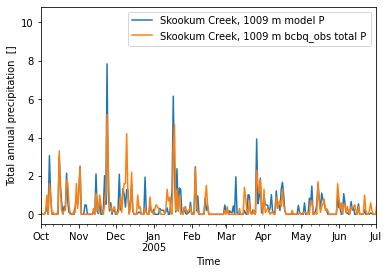

In [20]:
#plot precip in 2005
time_slice = [datetime(2004, 10, 1), datetime(2005, 7, 1)]

ax = df_model_data_Skookum.plot(kind='line',  y = 'prec_point', label = 'Skookum Creek, 1009 m model P')
df_snotel_obs_SPU_Skookum_P.plot(kind='line', y = 'Total', label = 'Skookum Creek, 1009 m bcbq_obs total P', ax = ax)
#df_snotel_Skookum.plot(kind='line', y = 'daily_P_in', label = 'Skookum Creek, 1009 m SPU total P', ax = ax)
ax.set_xlim(time_slice)
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')


In [21]:
df_model_data_Skookum['prec_point.cum'] = df_model_data_Skookum['prec_point'].cumsum()
df_snotel_obs_SPU_Skookum_P['Total.cum'] = df_snotel_obs_SPU_Skookum_P['Total'].cumsum()
df_snotel_Skookum['daily_P_in.cum'] = df_snotel_Skookum['daily_P_in'].cumsum()

In [22]:
df_snotel_obs_SPU_Skookum_P

,DateTime,Max,Min,Avg,Total,water_year,Total.cum
time,,,,,,,
1979-10-01,1979-10-01,0.0,0.0,0.0,0.0,1980,0.000
1979-10-02,1979-10-02,0.0,0.0,0.0,0.0,1980,0.000
1979-10-03,1979-10-03,0.0,0.0,0.0,0.0,1980,0.000
1979-10-04,1979-10-04,0.0,0.0,0.0,0.0,1980,0.000
1979-10-05,1979-10-05,0.0,0.0,0.0,0.0,1980,0.000
...,...,...,...,...,...,...,...
2020-09-27,2020-09-27,0.0,0.0,0.0,0.0,2020,5928.148
2020-09-28,2020-09-28,0.0,0.0,0.0,0.0,2020,5928.148
2020-09-29,2020-09-29,0.0,0.0,0.0,0.0,2020,5928.148


Text(0, 0.5, 'Total annual precipitation  []')

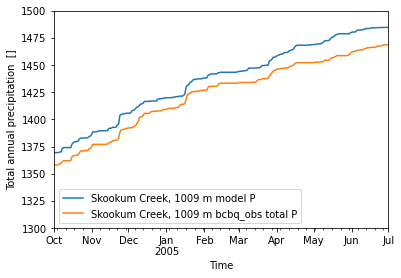

In [23]:
_time_slice = [datetime(1982, 10, 1), datetime(2015, 7, 1)]

ax = df_model_data_Skookum.plot(kind='line',  y = 'prec_point.cum', label = 'Skookum Creek, 1009 m model P')
#df_snotel_obs_SPU_Skookum_P.plot(kind='line', y = 'Total.cum', label = 'Skookum Creek, 1009 m SPU total P', ax = ax)
df_snotel_Skookum.plot(kind='line', y = 'daily_P_in.cum', label = 'Skookum Creek, 1009 m bcbq_obs total P', ax = ax)
ax.set_xlim(time_slice)
ax.set_ylim([1300, 1500])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')

Text(0, 0.5, 'Total annual precipitation  []')

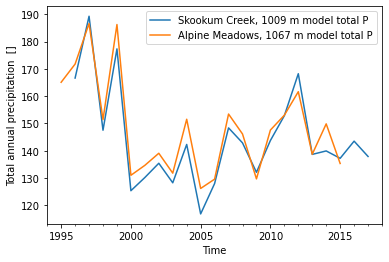

In [24]:
#plot model precip and obs precip at Alpine
#plot observed total P
ax = annual_P_Skookum_model_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Alpine_model_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')

Text(0, 0.5, 'SWE [m]')

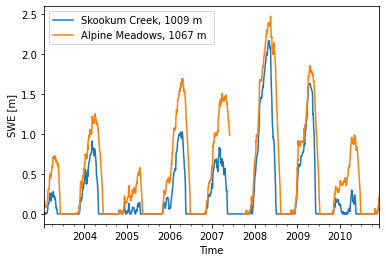

In [25]:
#plot SNOTELS:
ax = df_snotel_Skookum.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, 1009 m')
df_snotel_Alpine.plot(kind='line', y = 'SWE_m', label = 'Alpine Meadows, 1067 m ', ax = ax)
ax.set_xlim([datetime(2003, 1, 21), datetime(2010, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [m]')

#plt.show()

Text(0, 0.5, 'SWE [in]')

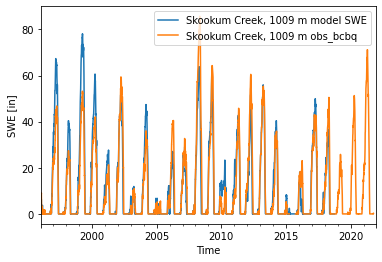

In [26]:
#plot modeled SWE vs. observed at Skookum Creek
ax = df_model_data_Skookum.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model SWE')
df_snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
ax.set_xlim([datetime(1996, 1, 21), datetime(2021, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

Text(0, 0.5, 'SWE [in]')

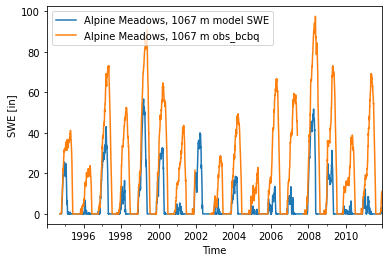

In [28]:
#plot modeled SWE vs. observed at Skookum Creek
ax = df_model_data_Alpine.plot(kind='line',  y = 'swq', label = 'Alpine Meadows, 1067 m model SWE')
df_snotel_Alpine.plot(kind='line',  y = 'SWE_in', label = 'Alpine Meadows, 1067 m obs_bcbq', ax = ax)
ax.set_xlim([datetime(1994, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

In [29]:
df_snotel_obs_SPU_Alpine_T

,DateTime,Max,Min,Avg,water_year,Tmean_C,Tmin_C,Tmax_C
time,,,,,,,,
1979-10-01,1979-10-01,58.3,40.4,48.950,1980,9.416667,4.666667,14.611111
1979-10-02,1979-10-02,77.3,35.6,56.300,1980,13.500000,2.000000,25.166667
1979-10-03,1979-10-03,60.3,35.6,48.558,1980,9.198889,2.000000,15.722222
1979-10-04,1979-10-04,62.3,39.6,50.596,1980,10.331111,4.222222,16.833333
1979-10-05,1979-10-05,62.3,36.6,49.575,1980,9.763889,2.555556,16.833333
...,...,...,...,...,...,...,...,...
2020-09-27,2020-09-27,56.0,41.0,47.375,2020,8.541667,5.000000,13.333333
2020-09-28,2020-09-28,74.0,51.0,60.500,2020,15.833333,10.555556,23.333333
2020-09-29,2020-09-29,77.0,61.0,65.500,2020,18.611111,16.111111,25.000000


Annual T mean Alpine model 4.909564300978213
Annual T mean Alpine observed 4.896350872233407
Difference annual Tmean model-obs 0.013213428744805356


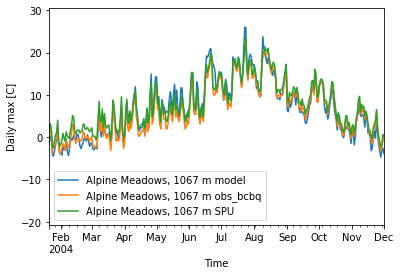

In [31]:
#plot temperature data
#plot modeled T vs. observed at Alpine Meadows
ax = df_model_data_Alpine.plot(kind='line',  y = 'tmean_point', label = 'Alpine Meadows, 1067 m model')
df_snotel_Alpine.plot(kind='line',  y = 'Tmean_C', label = 'Alpine Meadows, 1067 m obs_bcbq', ax = ax)
df_snotel_obs_SPU_Alpine_T_.plot(kind='line',  y = 'Tmean_C', label = 'Alpine Meadows, 1067 m SPU', ax = ax)

ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Daily max [C]')

mean_diff_T = df_model_data_Alpine.tmean_point.mean() - df_snotel_Alpine.Tmean_C.mean()

print('Annual T mean Alpine model', df_model_data_Alpine.tmean_point.mean())
print('Annual T mean Alpine observed', df_snotel_Alpine.Tmean_C.mean())
print('Difference annual Tmean model-obs', mean_diff_T)

Annual T mean Alpine model 1.5362767862899995
Annual T mean Alpine observed 2.149263891833322
Difference annual Tmean model-obs -0.6129871055433223


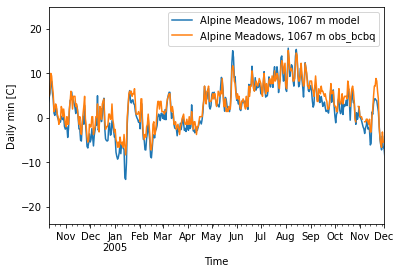

In [32]:
#plot temperature data
#plot modeled T vs. observed at Alpine Meadows
ax = df_model_data_Alpine.plot(kind='line',  y = 'tmin_point', label = 'Alpine Meadows, 1067 m model')
df_snotel_Alpine.plot(kind='line',  y = 'Tmin_C', label = 'Alpine Meadows, 1067 m obs_bcbq', ax = ax)
#df_snotel_obs_SPU_Alpine_T_.plot(kind='line',  y = 'Tmin_C', label = 'Alpine Meadows, 1067 m SPU', ax = ax)

ax.set_xlim([datetime(2004, 10, 11), datetime(2005, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Daily min [C]')

mean_diff_T = df_model_data_Alpine.tmin_point.mean() - df_snotel_Alpine.Tmin_C.mean()

print('Annual T mean Alpine model', df_model_data_Alpine.tmin_point.mean())
print('Annual T mean Alpine observed', df_snotel_Alpine.Tmin_C.mean())
print('Difference annual Tmean model-obs', mean_diff_T)

Annual T mean Alpine model 8.77459577426307
Annual T mean Alpine observed 9.182247426565795
Difference annual Tmean model-obs -0.40765165230272515


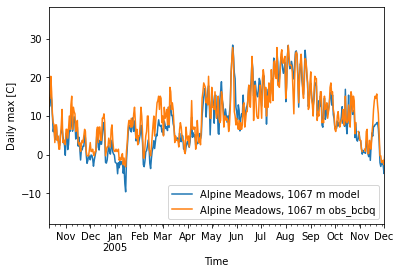

In [33]:
#plot temperature data
#plot modeled T vs. observed at Alpine Meadows
ax = df_model_data_Alpine.plot(kind='line',  y = 'tmax_point', label = 'Alpine Meadows, 1067 m model')
df_snotel_Alpine.plot(kind='line',  y = 'Tmax_C', label = 'Alpine Meadows, 1067 m obs_bcbq', ax = ax)
#df_snotel_obs_SPU_Alpine_T_.plot(kind='line',  y = 'Tmax_C', label = 'Alpine Meadows, 1067 m SPU', ax = ax)

ax.set_xlim([datetime(2004, 10, 11), datetime(2005, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Daily max [C]')

mean_diff_T = df_model_data_Alpine.tmax_point.mean() - df_snotel_Alpine.Tmax_C.mean()

print('Annual T mean Alpine model', df_model_data_Alpine.tmax_point.mean())
print('Annual T mean Alpine observed', df_snotel_Alpine.Tmax_C.mean())
print('Difference annual Tmean model-obs', mean_diff_T)

4.909564300978213
4.896350872233407


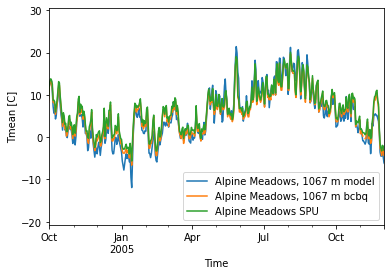

In [34]:
#plot modeled T vs. observed at
ax = df_model_data_Alpine.plot(kind='line',  y = 'tmean_point', label = 'Alpine Meadows, 1067 m model')
df_snotel_Alpine.plot(kind='line',  y = 'Tmean_C', label = 'Alpine Meadows, 1067 m bcbq', ax = ax)
df_snotel_obs_SPU_Alpine_T_.plot(kind='line',  y = 'Tmean_C', label = 'Alpine Meadows SPU', ax = ax)
ax.set_xlim([datetime(2004, 10, 1), datetime(2005, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Tmean [C]')

mean_diff_T = df_model_data_Skookum.tmean_point.mean() - df_snotel_Skookum.Tmean_C.mean()

print(df_model_data_Alpine.tmean_point.mean())
print(df_snotel_Alpine.Tmean_C.mean())

4.252572921222437
6.064711366256993
-1.812138445034556


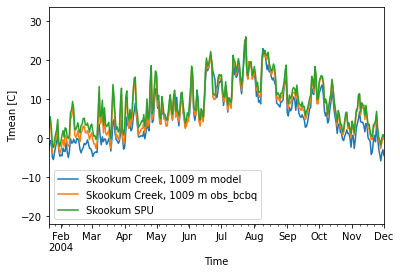

In [35]:
#plot modeled T vs. observed at Skookum Creek
ax = df_model_data_Skookum.plot(kind='line',  y = 'tmean_point', label = 'Skookum Creek, 1009 m model')
df_snotel_Skookum.plot(kind='line',  y = 'Tmean_C', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
df_snotel_obs_SPU_Skookum_T_.plot(kind='line',  y = 'Tmean_C', label = 'Skookum SPU', ax = ax)
ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Tmean [C]')

mean_diff_T = df_model_data_Skookum.tmean_point.mean() - df_snotel_Skookum.Tmean_C.mean()

print(df_model_data_Skookum.tmean_point.mean())
print(df_snotel_Skookum.Tmean_C.mean())
print(mean_diff_T)

0.9166234076414743
2.899502478405957
-1.9828790707644828


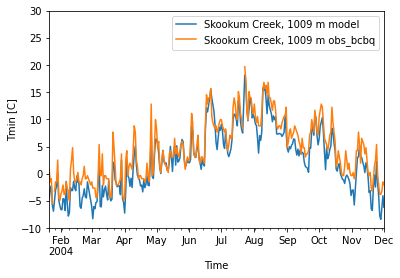

In [36]:
#plot modeled T vs. observed at Skookum Creek
ax = df_model_data_Skookum.plot(kind='line',  y = 'tmin_point', label = 'Skookum Creek, 1009 m model')
df_snotel_Skookum.plot(kind='line',  y = 'Tmin_C', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
#df_snotel_obs_SPU_Skookum_T_.plot(kind='line',  y = 'Tmin_C', label = 'Skookum SPU', ax = ax)
ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
ax.set_ylim([-10, 30])
plt.xlabel('Time')
plt.ylabel('Tmin [C]')

mean_diff_T = df_model_data_Skookum.tmin_point.mean() - df_snotel_Skookum.Tmin_C.mean()

print(df_model_data_Skookum.tmin_point.mean())
print(df_snotel_Skookum.Tmin_C.mean())
print(mean_diff_T)

7.841391969258946
10.270715267044466
-2.42932329778552


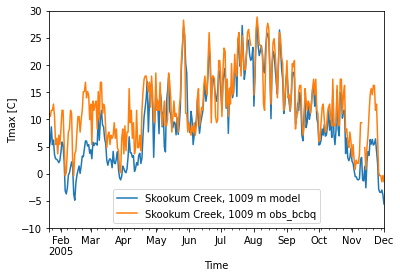

In [37]:
#plot modeled T vs. observed at Skookum Creek
ax = df_model_data_Skookum.plot(kind='line', y='tmax_point', label='Skookum Creek, 1009 m model')
df_snotel_Skookum.plot(kind='line', y='Tmax_C', label='Skookum Creek, 1009 m obs_bcbq', ax=ax)
#df_snotel_obs_SPU_Skookum_T_.plot(kind='line', y='Tmax_C', label='Skookum SPU', ax=ax)
ax.set_xlim([datetime(2005, 1, 21), datetime(2005, 12, 1)])
ax.set_ylim([-10, 30])
plt.xlabel('Time')
plt.ylabel('Tmax [C]')

mean_diff_T = df_model_data_Skookum.tmax_point.mean() - df_snotel_Skookum.Tmax_C.mean()

print(df_model_data_Skookum.tmax_point.mean())
print(df_snotel_Skookum.Tmax_C.mean())
print(mean_diff_T)

In [38]:
airTDJF_snotel_bcbq_Skookum = xc.atmos.tg_mean(ds_bcbq_obs_Skookum.Tmean_C, season="MAM")
airTDJF_snotel_bcbq_Alpine = xc.atmos.tg_mean(ds_bcbq_obs_Alpine.Tmean_C, season="MAM")

airTDJF_model_Skookum = xc.atmos.tg_mean(ds_model_point_Skookum.tmean_point, season="MAM")
airTDJF_model_Alpine = xc.atmos.tg_mean(ds_model_point_Alpine.tmean_point, season="MAM")

tas_C_snotel_bcbq_Skookum = xc.units.convert_units_to(airTDJF_snotel_bcbq_Skookum, "degC")
tas_C_snotel_bcbq_Alpine = xc.units.convert_units_to(airTDJF_snotel_bcbq_Alpine, "degC")

tas_C_model_Skookum = xc.units.convert_units_to(airTDJF_model_Skookum, "degC")
tas_C_model_Alpine = xc.units.convert_units_to(airTDJF_model_Alpine, "degC")


print("airTDJF_snotel_bcbq_Skookum =", tas_C_snotel_bcbq_Skookum.mean())
print("airTDJF_snotel_bcbq_Alpine =", tas_C_snotel_bcbq_Alpine.mean())

print("airTDJF_model_Skookum =", tas_C_model_Skookum.mean())
print("airTDJF_model_Alpine =", tas_C_model_Alpine.mean())

#airTDJF_DM = xc.atmos.tg_mean(ds2.airtemp, season="DJF")
#airT_Y_DM = xc.atmos.tg_mean(ds2.airtemp, freq="YS")



airTDJF_snotel_bcbq_Skookum = <xarray.DataArray 'tg_mean' ()>
array(4.25279891)
airTDJF_snotel_bcbq_Alpine = <xarray.DataArray 'tg_mean' ()>
array(3.00115166)
airTDJF_model_Skookum = <xarray.DataArray 'tg_mean' ()>
array(1.88765271)
airTDJF_model_Alpine = <xarray.DataArray 'tg_mean' ()>
array(3.13892598)


/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/indicators/atmos/_precip.py:80: UserWarning: Variable does not have a `standard_name` attribute.
  cfchecks.check_valid(tas, "standard_name", "air_temperature")
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Varia

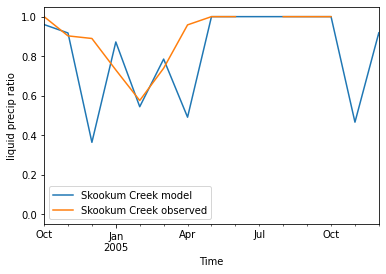

In [29]:
pr_liquid_ratio_Skookum_model = xc.indicators.atmos._precip.liquid_precip_ratio(ds_model_point_Skookum.prec_point, ds_model_point_Skookum.tmean_point, freq="M")
pr_liquid_ratio_Skookum_observed = xc.indicators.atmos._precip.liquid_precip_ratio(ds_bcbq_obs_Skookum.daily_P_in, ds_bcbq_obs_Skookum.Tmean_C, freq="M")

ax = pr_liquid_ratio_Skookum_model.to_dataframe().liquid_precip_ratio.plot(kind='line',  label = 'Skookum Creek model')
pr_liquid_ratio_Skookum_observed.to_dataframe().liquid_precip_ratio.plot(kind='line', label = 'Skookum Creek observed', ax = ax)
ax.set_xlim([datetime(2004, 10, 1), datetime(2005, 12, 1)])
plt.xlabel('Time')
plt.ylabel('liquid precip ratio')
plt.gca().legend(('Skookum Creek model','Skookum Creek observed'))

In [30]:
pr_liquid_ratio_Alpine_model.to_dataframe.plot(kind='line',  y = 'tmax_point', label = 'Skookum Creek, 1009 m model')

NameError: name 'pr_liquid_ratio_Alpine_model' is not defined

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/indicators/atmos/_precip.py:80: UserWarning: Variable does not have a `standard_name` attribute.
  cfchecks.check_valid(tas, "standard_name", "air_temperature")
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Varia

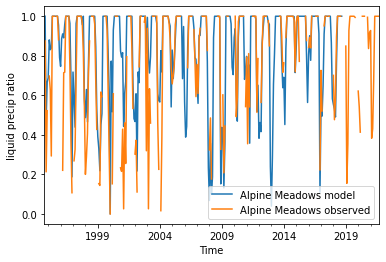

In [31]:
pr_liquid_ratio_Alpine_model = xc.indicators.atmos._precip.liquid_precip_ratio(ds_model_point_Alpine.prec_point, ds_model_point_Alpine.tmean_point, freq="M")
pr_liquid_ratio_Alpine_observed = xc.indicators.atmos._precip.liquid_precip_ratio(ds_bcbq_obs_Alpine.daily_P_in, ds_bcbq_obs_Alpine.Tmean_C, freq="M")

ax = pr_liquid_ratio_Alpine_model.to_dataframe().liquid_precip_ratio.plot(kind='line',  label = 'Alpine Meadows')
pr_liquid_ratio_Alpine_observed.to_dataframe().liquid_precip_ratio.plot(kind='line', label = 'Alpine Meadows', ax = ax)
#ax.set_xlim([datetime(2004, 10, 1), datetime(2005, 12, 1)])
plt.xlabel('Time')
plt.ylabel('liquid precip ratio')
plt.gca().legend(('Alpine Meadows model','Alpine Meadows observed'))

In [32]:
#get monthly air tem means

In [33]:
path_snotel_skooK_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.txt'
#skooK_P_SPU = pd.read_csv(ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.csv')

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


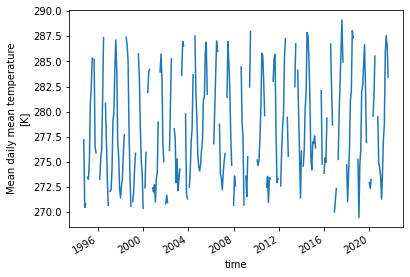

In [34]:
temp = xc.atmos.tg_mean(ds_bcbq_obs_Alpine.Tmean_C, freq="MS")
temp.plot()

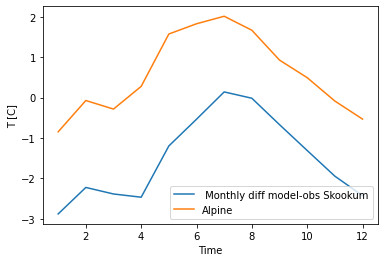

diff_mean_monthly_mean_model_obs_Alpine <xarray.DataArray (month: 12)>
array([-0.84803548, -0.07278038, -0.28506822,  0.27770822,  1.57482218,
        1.82821634,  2.01474044,  1.66802036,  0.92860486,  0.4932544 ,
       -0.08584586, -0.53308483])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
10.270715267044466
-2.1063261554985733


In [37]:
mo_Tmean_bcbq_obs_Alpine = ds_bcbq_obs_Alpine.Tmean_C.groupby("time.month").mean(dim='time')
#print('Monthly mean obs snotel Alpine = ',mo_Tmean_bcbq_obs_Alpine)
mo_Tmean_model_Alpine = ds_model_point_Alpine.tmean_point.groupby("time.month").mean(dim='time')
#print('Monthly mean model snotel Alpine =',mo_Tmean_model_Alpine)
diff_mean_monthly_mean_model_obs_Alpine = mo_Tmean_model_Alpine - mo_Tmean_bcbq_obs_Alpine

mo_Tmean_bcbq_obs_Skookum = ds_bcbq_obs_Skookum.Tmean_C.groupby("time.month").mean(dim='time')
mo_Tmean_model_Skookum = ds_model_point_Skookum.tmean_point.groupby("time.month").mean(dim='time')
diff_mean_monthly_mean_model_obs_Skookum = mo_Tmean_model_Skookum - mo_Tmean_bcbq_obs_Skookum

ax = diff_mean_monthly_mean_model_obs_Skookum.plot.line()
diff_mean_monthly_mean_model_obs_Alpine.plot.line()
#ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('T [C]')
plt.gca().legend((' Monthly diff model-obs Skookum','Alpine'))
plt.show()

print('diff_mean_monthly_mean_model_obs_Alpine', diff_mean_monthly_mean_model_obs_Alpine)
print(df_snotel_Skookum.Tmax_C.mean())
print(mean_diff_T)

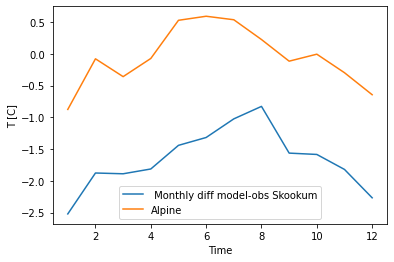

In [38]:
mo_Tmin_bcbq_obs_Alpine = ds_bcbq_obs_Alpine.Tmin_C.groupby("time.month").mean(dim='time')
#print('Monthly mean obs snotel Alpine = ',mo_Tmean_bcbq_obs_Alpine)
mo_Tmin_model_Alpine = ds_model_point_Alpine.tmin_point.groupby("time.month").mean(dim='time')
#print('Monthly mean model snotel Alpine =',mo_Tmean_model_Alpine)
diff_min_monthly_mean_model_obs_Alpine = mo_Tmin_model_Alpine - mo_Tmin_bcbq_obs_Alpine

mo_Tmin_bcbq_obs_Skookum = ds_bcbq_obs_Skookum.Tmin_C.groupby("time.month").mean(dim='time')
mo_Tmin_model_Skookum = ds_model_point_Skookum.tmin_point.groupby("time.month").mean(dim='time')
diff_min_monthly_mean_model_obs_Skookum = mo_Tmin_model_Skookum - mo_Tmin_bcbq_obs_Skookum

ax = diff_min_monthly_mean_model_obs_Skookum.plot.line()
diff_min_monthly_mean_model_obs_Alpine.plot.line()
#ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('T [C]')
plt.gca().legend((' Monthly diff model-obs Skookum','Alpine'))
plt.show()

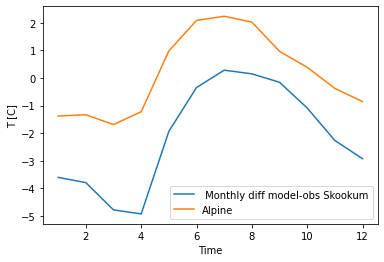

In [39]:
mo_Tmax_bcbq_obs_Alpine = ds_bcbq_obs_Alpine.Tmax_C.groupby("time.month").mean(dim='time')
#print('Monthly mean obs snotel Alpine = ',mo_Tmean_bcbq_obs_Alpine)
mo_Tmax_model_Alpine = ds_model_point_Alpine.tmax_point.groupby("time.month").mean(dim='time')
#print('Monthly mean model snotel Alpine =',mo_Tmean_model_Alpine)
diff_max_monthly_mean_model_obs_Alpine = mo_Tmax_model_Alpine - mo_Tmax_bcbq_obs_Alpine

mo_Tmax_bcbq_obs_Skookum = ds_bcbq_obs_Skookum.Tmax_C.groupby("time.month").mean(dim='time')
mo_Tmax_model_Skookum = ds_model_point_Skookum.tmax_point.groupby("time.month").mean(dim='time')
diff_max_monthly_mean_model_obs_Skookum = mo_Tmax_model_Skookum - mo_Tmax_bcbq_obs_Skookum

ax = diff_max_monthly_mean_model_obs_Skookum.plot.line()
diff_max_monthly_mean_model_obs_Alpine.plot.line()
#ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('T [C]')
plt.gca().legend((' Monthly diff model-obs Skookum','Alpine'))
plt.show()

In [40]:
mo_Tmean_obs_Tolt_SPU = df_Tolt_dam_T_SPU.Tmean_C.groupby("time.month").mean(dim='time')
mo_Tmean_obs_Tolt_SPU

KeyError: 'time.month'

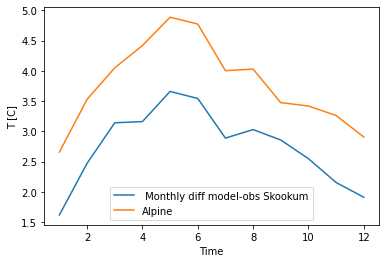

diff_mean_monthly_mean_model_obs_Alpine <xarray.DataArray 'Tmean_C' (month: 12)>
array([2.65925103, 3.53165083, 4.05152554, 4.42071083, 4.8882281 ,
       4.77601631, 4.00454929, 4.03053909, 3.47635554, 3.42088342,
       3.26313975, 2.90903406])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


In [47]:
mo_Tmean_bcbq_obs_Alpine = ds_bcbq_obs_Alpine.Tmean_C.groupby("time.month").mean(dim='time')
#print('Monthly mean obs snotel Alpine = ',mo_Tmean_bcbq_obs_Alpine)
mo_Tmean_obs_Tolt_SPU = ds_Tolt_dam_T_SPU.Tmean_C.groupby("time.month").mean(dim='time')
diff_mean_monthly_mean_ToltDam_obs_Alpine = mo_Tmean_obs_Tolt_SPU - mo_Tmean_bcbq_obs_Alpine

mo_Tmean_bcbq_obs_Skookum = ds_bcbq_obs_Skookum.Tmean_C.groupby("time.month").mean(dim='time')

mo_Tmean_obs_Tolt_SPU = ds_Tolt_dam_T_SPU.Tmean_C.groupby("time.month").mean(dim='time')
diff_mean_monthly_mean_ToltDam_obs_Skookum = mo_Tmean_obs_Tolt_SPU - mo_Tmean_bcbq_obs_Skookum

ax = diff_mean_monthly_mean_ToltDam_obs_Skookum.plot.line()
diff_mean_monthly_mean_ToltDam_obs_Alpine.plot.line()
#ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('T [C]')
plt.gca().legend((' Monthly diff model-obs Skookum','Alpine'))
plt.show()

print('diff_mean_monthly_mean_model_obs_Alpine', diff_mean_monthly_mean_ToltDam_obs_Alpine)
#print(df_snotel_Skookum.Tmax_C.mean())
#print(mean_diff_T)


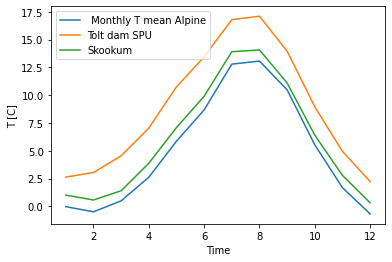

In [46]:
ax = mo_Tmean_bcbq_obs_Alpine.plot.line()
mo_Tmean_obs_Tolt_SPU.plot.line()
mo_Tmean_bcbq_obs_Skookum.plot.line()
#ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('T [C]')
plt.gca().legend((' Monthly T mean Alpine obs','Tolt dam SPU', 'Skookum'))
plt.show()


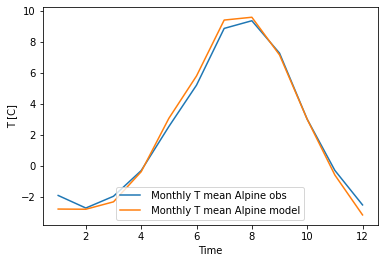

<xarray.DataArray 'tmean_point' (month: 12)>
array([-0.87504767, -0.56242181,  0.20864751,  2.89499694,  7.43197611,
       10.50042361, 14.80320802, 14.73442593, 11.40401445,  6.02044881,
        1.58807175, -1.21482892])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [50]:
ax = mo_Tmin_bcbq_obs_Alpine.plot.line()
mo_Tmin_model_Alpine.plot.line()
#mo_Tmean_obs_Tolt_SPU.plot.line()
#mo_Tmean_bcbq_obs_Skookum.plot.line()
#ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('T [C]')
plt.gca().legend((' Monthly T mean Alpine obs',' Monthly T mean Alpine model', 'Skookum'))
plt.show()


mo_Tmean_model_Alpine

In [42]:
539 meters

SyntaxError: invalid syntax (2613211408.py, line 1)

In [56]:
delta_elev_dam_Alpine = (1067-539)/1000
delta_elev_dam_Skookum = (1009-539)/1000

In [57]:
lapse_rates_Alpine = diff_mean_monthly_mean_ToltDam_obs_Alpine/delta_elev_dam_Alpine

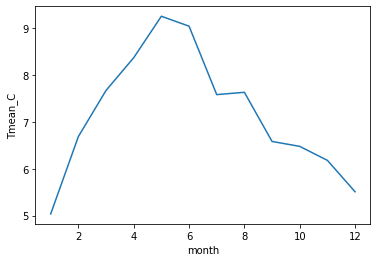

In [59]:
lapse_rates_Alpine

In [60]:
lapse_rates_Skookum = diff_mean_monthly_mean_ToltDam_obs_Skookum/delta_elev_dam_Skookum

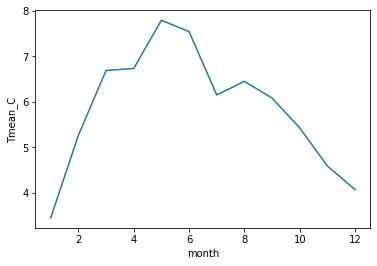

In [61]:
lapse_rates_Skookum

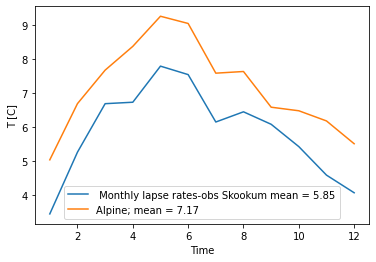

In [55]:
ax = lapse_rates_Skookum.plot.line()
lapse_rates_Alpine.plot.line()
#ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('T [C]')
plt.gca().legend((' Monthly lapse rates-obs Skookum mean = 5.85','Alpine; mean = 7.17'))
plt.show()


In [53]:
lapse_rates_Skookum.mean()

<xarray.DataArray 'Tmean_C' ()>
array(5.85154924)

In [54]:
lapse_rates_Alpine.mean()

<xarray.DataArray 'Tmean_C' ()>
array(7.17043621)